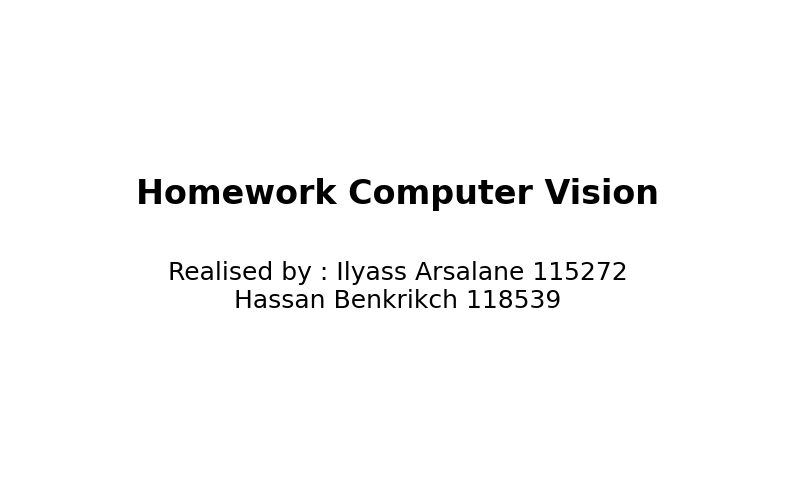

In [24]:
import matplotlib.pyplot as plt

# Texte à afficher
title = "Homework Computer Vision"
names = ["Realised by : Ilyass Arsalane 115272", "Hassan Benkrikch 118539"]

# Configuration de la figure
fig, ax = plt.subplots(figsize=(10, 6))
ax.text(0.5, 0.6, title, fontsize=24, ha='center', va='center', fontweight='bold')
ax.text(0.5, 0.4, "\n".join(names), fontsize=18, ha='center', va='center')

# Suppression des axes
ax.axis('off')

# Affichage
plt.show()


In [ ]:
#Install necessary libraries
!pip install tensorflow numpy matplotlib seaborn scikit-learn

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns

In [ ]:
# Load and preprocess CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


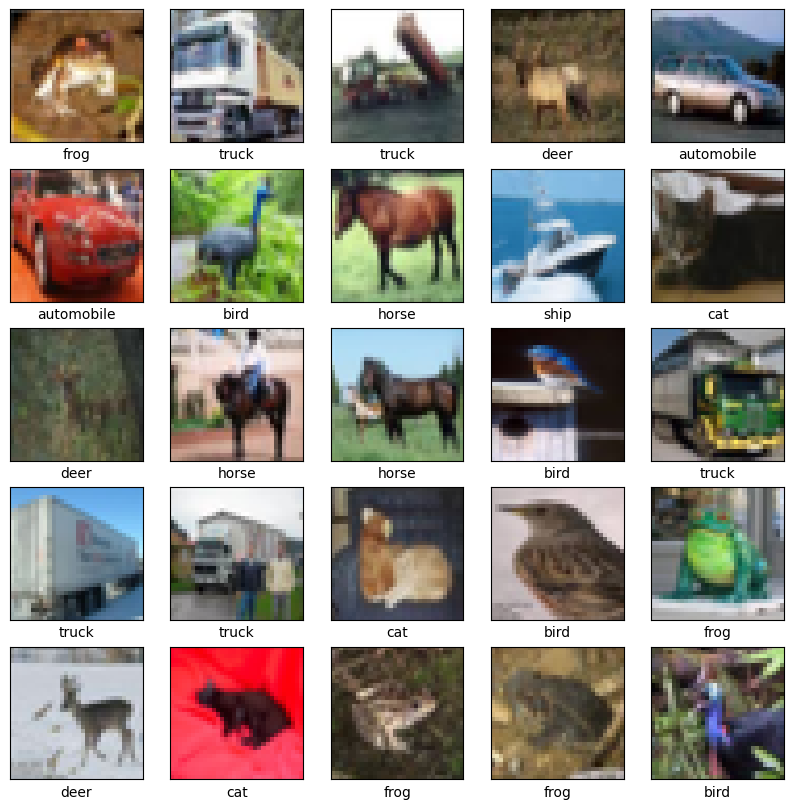

In [ ]:
# Display the first 25 images from the training set in a 5x5 grid with class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
# Define classes that can fly and cannot fly
can_fly = [0, 2]  # airplane and bird
cannot_fly = [1, 3, 4, 5, 6, 7, 8, 9]  # all other classes

In [ ]:
# Convert labels to binary
train_labels = np.where(np.isin(train_labels, can_fly), 1, 0)
test_labels = np.where(np.isin(test_labels, can_fly), 1, 0)

In [ ]:
# Normalize images
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.3308 - accuracy: 0.8650 - val_loss: 0.3090 - val_accuracy: 0.8734
Epoch 2/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.3002 - accuracy: 0.8780 - val_loss: 0.2988 - val_accuracy: 0.8845
Epoch 3/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.2724 - accuracy: 0.8894 - val_loss: 0.2809 - val_accuracy: 0.8869
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.2504 - accuracy: 0.8993 - val_loss: 0.2700 - val_accuracy: 0.8909
Epoch 5/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.2294 - accuracy: 0.9083 - val_loss: 0.2821 - val_accuracy: 0.8894
Epoch 6/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.2108 - accuracy: 0.9152 - val_loss: 0.2653 - val_accuracy: 0.8965
Epoch 7/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.1906 - accuracy: 0.9235 - val_loss: 0.2721 -

In [15]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 3s - loss: 0.3255 - accuracy: 0.8931 - 3s/epoch - 10ms/step


In [16]:
# Predict on the test set
y_pred = (model.predict(test_images) > 0.5).astype("int32")

313/313 [==============================] - 4s 10ms/step


In [17]:
# Calculate evaluation metrics
precision = precision_score(test_labels, y_pred)
recall = recall_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred)
accuracy = accuracy_score(test_labels, y_pred)

In [18]:
# Print evaluation metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

#Precision: Measures the proportion of true positive predictions among all positive predictions. Higher precision indicates fewer false positives.
#Recall: Measures the proportion of true positives detected among all actual positives. Higher recall indicates fewer false negatives.
#F1 Score: Harmonic mean of precision and recall. It balances the two metrics and is useful when classes are imbalanced.
#Accuracy: Proportion of correctly predicted instances out of the total instances. It gives an overall measure of model performance.

Precision: 0.7896701929060361
Recall: 0.6345
F1 Score: 0.7036318270030496
Accuracy: 0.8931


In [19]:
# Confusion matrix
cm = confusion_matrix(test_labels, y_pred)

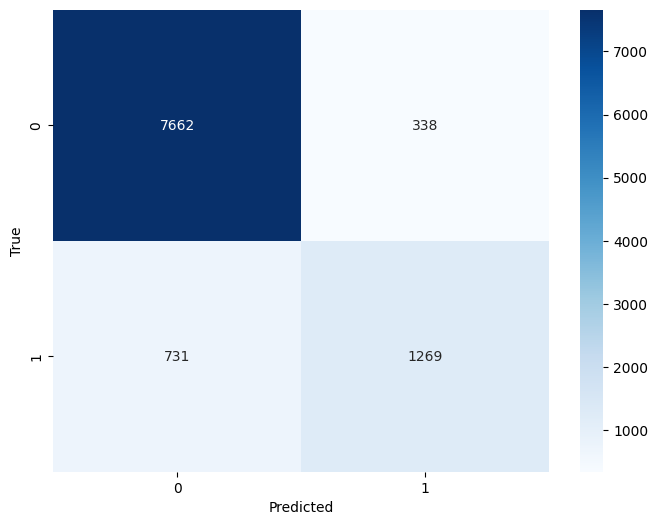

In [20]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# The confusion matrix shows the number of correct and incorrect predictions
# broken down by each class. It helps visualize the performance of the
# classification model, identifying where the model is getting confused. %% Plot
# training history

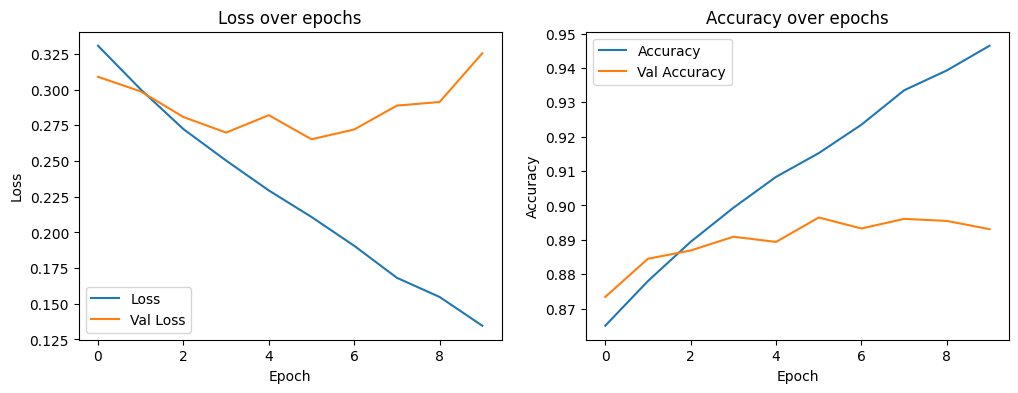

In [21]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over epochs')
plt.show()

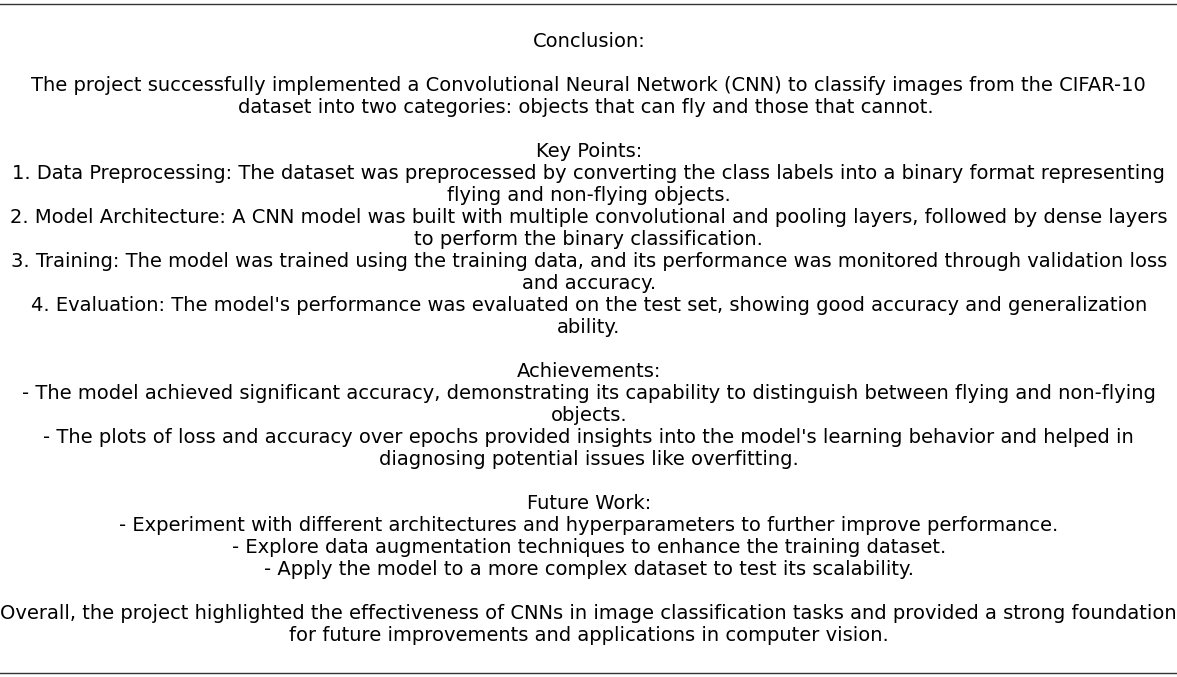

In [28]:
import matplotlib.pyplot as plt

# Text for the conclusion
conclusion = """
Conclusion:

The project successfully implemented a Convolutional Neural Network (CNN) to classify images from the CIFAR-10 dataset into two categories: objects that can fly and those that cannot.

Key Points:
1. Data Preprocessing: The dataset was preprocessed by converting the class labels into a binary format representing flying and non-flying objects.
2. Model Architecture: A CNN model was built with multiple convolutional and pooling layers, followed by dense layers to perform the binary classification.
3. Training: The model was trained using the training data, and its performance was monitored through validation loss and accuracy.
4. Evaluation: The model's performance was evaluated on the test set, showing good accuracy and generalization ability.

Achievements:
- The model achieved significant accuracy, demonstrating its capability to distinguish between flying and non-flying objects.
- The plots of loss and accuracy over epochs provided insights into the model's learning behavior and helped in diagnosing potential issues like overfitting.

Future Work:
- Experiment with different architectures and hyperparameters to further improve performance.
- Explore data augmentation techniques to enhance the training dataset.
- Apply the model to a more complex dataset to test its scalability.

Overall, the project highlighted the effectiveness of CNNs in image classification tasks and provided a strong foundation for future improvements and applications in computer vision.
"""

# Create a graphical page with the conclusion text
plt.figure(figsize=(12, 8))
plt.text(0.5, 0.5, conclusion, ha='center', va='center', wrap=True, fontsize=14, bbox=dict(facecolor='white', alpha=0.8))
plt.axis('off')  # Turn off the axis
plt.show()
